# Evan Varan, lze4

In [27]:
#1) Imports
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

# 2. Load the mnist dataset from sklearn

In [28]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

# 3. Select 30,000 samples from the dataset to work with

In [29]:
X_sampled = X[:30000]
y_sampled = y[:30000]

# 4. Print the shape

In [30]:
print(X_sampled.shape)

(30000, 784)


# 5. Apply t-SNE for data exploration/visualization

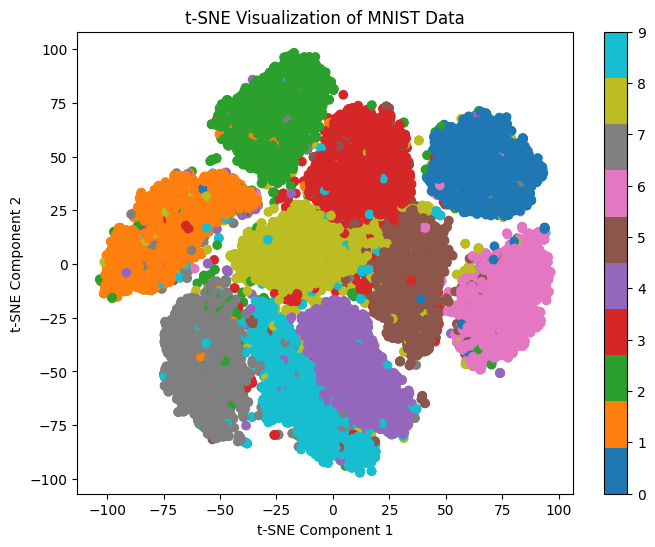

In [31]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sampled.astype(int), cmap='tab10')
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

# 6. Apply UMAP for data exploration/visualization

C:\Users\Brick\PycharmProjects\MachineLearning\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


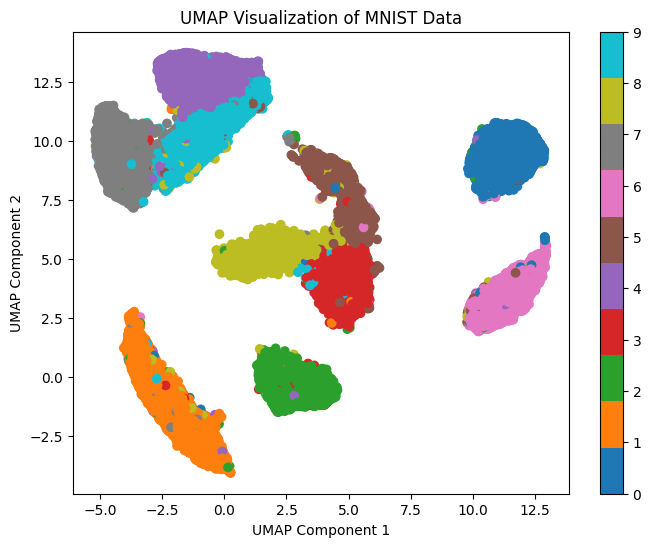

In [32]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_sampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sampled.astype(int), cmap='tab10')
plt.title('UMAP Visualization of MNIST Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar()
plt.show()


# 7. Explanations of the plots

t-SNE has data that is closer together. This could mean that with further away points its accuracy would falter.
UMAP has points that are both far away and clustered together. It seems that UMAP is better for larger datasets for this reason

# 8. Split data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# 9. Standardize the training data

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Apply PCA to the standardized training data, and keep 95% of the information while reducing features

In [35]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

# 11. Transform the test data using the fitted PCA model

In [36]:
X_test_pca = pca.transform(X_test_scaled)

# 12. Print out the number of features after applying PCA

In [37]:
print(f"Number of features after PCA: {X_train_pca.shape[1]}")

Number of features after PCA: 307


# 13. Print out the shape after applying PCA

In [38]:
print(f"Shape after applying PCA (Training Set): {X_train_pca.shape}")
print(f"Shape after applying PCA (Test Set): {X_test_pca.shape}")

Shape after applying PCA (Training Set): (24000, 307)
Shape after applying PCA (Test Set): (6000, 307)


# 14. Explain why the shape is (24,000,310) instead of (30,000,784)

PCA only keeps the components of the dataset that absolutely essential to the variance. This means that of 784 features, 310 were essential.

# 15. Apply your choice of classification algorithm (using svm algorithm from hw4)

In [39]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_pca, y_train)

y_pred_test = svm_model.predict(X_test_pca)
y_pred_train = svm_model.predict(X_train_pca)

test_accuracy = accuracy_score(y_test, y_pred_test)
training_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9840416666666667
Test Accuracy: 0.9578333333333333
